<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Clean Data

### Initializations

In [60]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [62]:
df = pd.read_pickle('exchange/hr_01_loaded_train.pkl')
df_test = pd.read_pickle('exchange/hr_01_loaded_test.pkl')

In [63]:
# Eingelesene Daten überprüfen
print(color.BOLD + 'Info about HR Training Dataframe' + color.END)
print(df.info())
print()
print(color.BOLD + 'Info about HR Test Dataframe' + color.END)
print(df_test.info())

Info about HR Training Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 10 columns):
satisfactionLevel       11999 non-null float64
yearsSinceEvaluation    11999 non-null float64
numberOfProjects        11999 non-null int64
averageMonthlyHours     11999 non-null int64
yearsAtCompany          11999 non-null int64
workAccident            11999 non-null category
hasLeftCompany          11999 non-null category
gotPromotion            11999 non-null category
department              11999 non-null category
salary                  11999 non-null category
dtypes: category(5), float64(2), int64(3)
memory usage: 527.5 KB
None

Info about HR Test Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
satisfactionLevel       3000 non-null float64
yearsSinceEvaluation    3000 non-null float64
numberOfProjects        3000 non-null int64
averageMonthlyHours     3000 non-null int64
yea

### Check Data

In [64]:
# Überprüfung auf Null-Werte
df.isnull().any()

satisfactionLevel       False
yearsSinceEvaluation    False
numberOfProjects        False
averageMonthlyHours     False
yearsAtCompany          False
workAccident            False
hasLeftCompany          False
gotPromotion            False
department              False
salary                  False
dtype: bool

In [65]:
# Überprüfung der Spalten mit Zahlenwerten auf Plausibilität
df.describe(include=[np.number])

,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,0.613629,0.714835,3.797816,200.842904,3.502959
std,0.248212,0.171339,1.234928,49.870154,1.467536
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


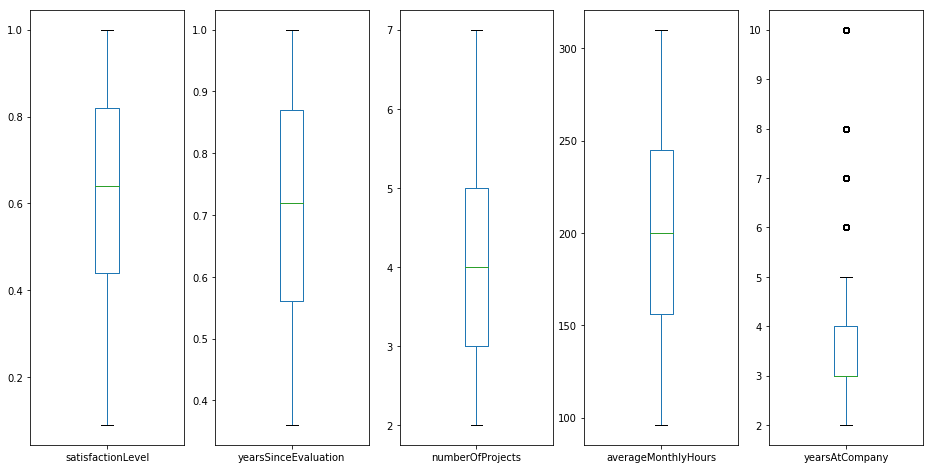

In [66]:
# Visualisierung der Spalten mit Zahlenwerten
count_number_colums = df.select_dtypes(include=[np.number]).columns.size
f, axes = plt.subplots(1, count_number_colums, figsize=(16,8))
for idx, col in enumerate(df.select_dtypes(include=[np.number])):
    df[col].plot.box(ax=axes[idx])
    

In [67]:
# Überprüfung der Spalten mit Kategorien auf Plausibilität
df.describe(include=['category'])

,workAccident,hasLeftCompany,gotPromotion,department,salary
count,11999,11999,11999,11999,11999
unique,2,2,2,10,3
top,0,0,0,sales,low
freq,10245,9149,11739,3325,5845
